<ipython-input-127-b36eeeb03b00>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data.iloc[:, 0] = data.iloc[:, 0].str.replace('\D', '').astype(int)


0      20210101
1      20210102
2      20210103
3      20210104
4      20210105
         ...   
170    20210619
171    20210620
172    20210621
173    20210622
174    20210624
Name: Date, Length: 175, dtype: int32


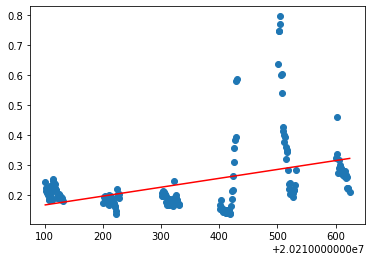

array([[0.32146573]])

In [127]:
#linear
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

data = pd.read_csv('C:/Users/Chris Nguyen/Downloads/ABBC.csv')  # load data set
data.iloc[:, 0] = data.iloc[:, 0].astype(str)
data.iloc[:, 0] = data.iloc[:, 0].str.replace('\D', '').astype(int)
print(data.iloc[:,0])
#data.iloc[:, 0].apply(lambda x:x.toordinal())
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
new_X = 20210625
linear_regressor.predict([[new_X]])

In [128]:
new_X = 20210701
linear_regressor.predict([[new_X]])

array([[0.34403392]])

In [129]:
new_X = 20220624
linear_regressor.predict([[new_X]])

array([[3.29066682]])

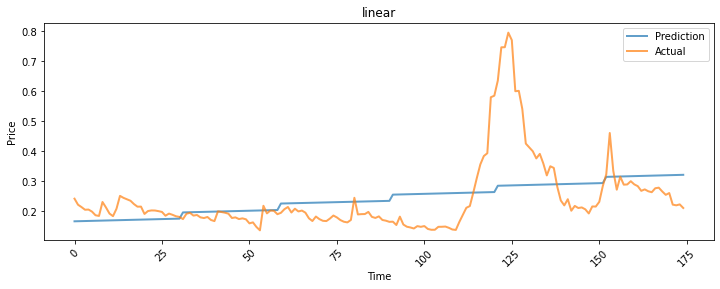

In [140]:
plt.figure(figsize=(12,4))
plt.plot(Y_pred, label="Prediction", lw = 2, alpha = .7)
plt.plot(Y, label="Actual", lw = 2, alpha = .7)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("linear")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [131]:
#SVR-already implemented version
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

df = pd.read_csv("C:/Users/Chris Nguyen/Downloads/ABBC.csv")
df = df.set_index(pd.DatetimeIndex(df["Date"].values))


In [132]:
future_days  = 7
#create prediction column
df[str(future_days) + "_Day_Price_Forecast"] = df[['Close']].shift(-future_days)
#show data
df[["Close", str(future_days) + "_Day_Price_Forecast"]]

,Close,7_Day_Price_Forecast
2021-01-01,0.241450,0.183797
2021-01-02,0.221278,0.230380
2021-01-03,0.213344,0.211985
2021-01-04,0.204514,0.191714
2021-01-05,0.205110,0.183068
...,...,...
2021-06-19,0.260295,NaN
2021-06-20,0.221569,NaN
2021-06-21,0.219248,NaN
2021-06-22,0.222360,NaN


In [141]:
X = np.array(df[["Close"]])
X = X[:df.shape[0] - future_days]
#print(X)
y = np.array(df[str(future_days) + "_Day_Price_Forecast"])
y = y[:-future_days]
#print(y)

#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(y_test)

from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

[0.177093   0.16748799 0.28899601 0.215137   0.191714   0.164382
 0.28103799 0.26622799 0.63610601 0.18761501 0.239325   0.174945
 0.23965199 0.37596199 0.19210701 0.175936   0.21901201 0.29984599
 0.22236    0.18028399 0.189821   0.18956999 0.18448    0.18693399
 0.16794901 0.15897501 0.13712101 0.194216   0.18178201 0.28323299
 0.21673401 0.207765   0.14740101 0.21771801]
svr_rbf accuracy:  -0.0842887386102007


In [142]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
new_X = 20210625
svr_rbf.predict([[new_X]])

[0.25354252 0.25576319 0.26234745 0.25595    0.25620733 0.25375889
 0.27143584 0.26274128 0.26070944 0.25587083 0.25822489 0.25544168
 0.26827472 0.30040286 0.25733818 0.25634594 0.27076091 0.26545351
 0.26180535 0.25376974 0.25420326 0.25291477 0.25702181 0.2548892
 0.25506127 0.25543645 0.25098528 0.2517209  0.2554799  0.25665739
 0.25182565 0.25571429 0.25222884 0.25377925]


array([0.26913506])

In [143]:
new_X = 20210701
svr_rbf.predict([[new_X]])

array([0.26913506])

In [144]:
new_X = 20220624
svr_rbf.predict([[new_X]])

array([0.26913506])

In [145]:
print(y_test)

[0.177093   0.16748799 0.28899601 0.215137   0.191714   0.164382
 0.28103799 0.26622799 0.63610601 0.18761501 0.239325   0.174945
 0.23965199 0.37596199 0.19210701 0.175936   0.21901201 0.29984599
 0.22236    0.18028399 0.189821   0.18956999 0.18448    0.18693399
 0.16794901 0.15897501 0.13712101 0.194216   0.18178201 0.28323299
 0.21673401 0.207765   0.14740101 0.21771801]


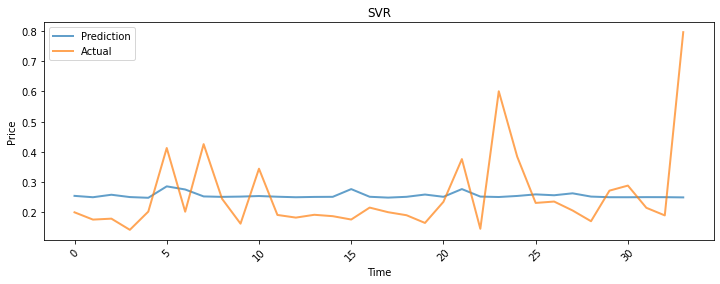

In [139]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label="Prediction", lw = 2, alpha = .7)
plt.plot(y_test, label="Actual", lw = 2, alpha = .7)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("SVR")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [170]:
#SVR scratch version
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

class SVR(object):
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        
    def fit(self, X, y, length = 100, rate=0.1):
        self.sess = tf.compat.v1.Session()
        
        feature = X.shape[-1] if len(X.shape) > 1 else 1
        
        self.X = tf.placeholder(dtype=tf.float32)
        self.y = tf.placeholder(dtype=tf.float32)
        
        self.b = tf.Variable(tf.random_normal(shape=(1,)))
        self.W = tf.Variable(tf.random_normal(shape=(feature, 1)))
                
        self.y_pred = tf.matmul(self.X, self.W) + self.b
        
        self.loss = tf.reduce_mean(tf.maximum(0., tf.abs(self.y_pred - self.y) - self.epsilon)) + tf.norm(self.W)/2

        
        opt = tf.train.GradientDescentOptimizer(learning_rate=rate)
        opt_op = opt.minimize(self.loss)

        self.sess.run(tf.global_variables_initializer())
        
        for i in range(length):
            
            self.sess.run(
                opt_op, 
                {
                    self.X: X,
                    self.y: y
                }
            )
            
        return self
            
    def predict(self, X, y=None):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        y_pred = self.sess.run(
            self.y_pred, 
            {
                self.X: X 
            }
        )
        return y_pred

C:\Users\steve\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVR from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


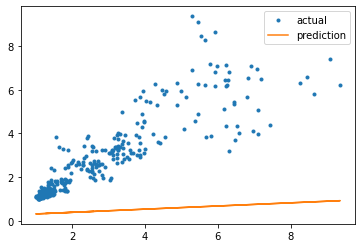

In [4]:
# model = SVR(epsilon=0.1)

# load saved model
import pickle
model_filename = 'SVR.sav'
model = pickle.load(open(model_filename, 'rb'))

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
future_days  = 7
df = pd.read_csv("price-data/ABBC.csv")
df = df.set_index(pd.DatetimeIndex(df["Date"].values))
df[str(future_days) + "_Day_Price_Forecast"] = df[['Close']].shift(-future_days)
X = np.array(df[["Close"]])
X = X[:df.shape[0] - future_days]
#print(X)
y = np.array(df[str(future_days) + "_Day_Price_Forecast"])
y = y[:-future_days]

# model.fit(X, y)

plt.plot(X, y, ".", X, model.predict(X), "-")
plt.legend(["actual", "prediction"])
plt.show()

In [8]:
preds = model.predict(X)

array([[1.276137],
       [1.326804],
       [1.390187],
       [1.40754 ],
       [1.570182],
       [1.530911],
       [1.544127],
       [1.44071 ],
       [1.492555],
       [1.67764 ],
       [1.724925],
       [1.680636],
       [1.81034 ],
       [1.787363],
       [1.70026 ],
       [1.584119],
       [1.753409],
       [1.83    ],
       [1.923349],
       [1.869994],
       [1.908268],
       [1.711176],
       [1.800294],
       [1.645264],
       [1.796   ],
       [1.848473],
       [1.798489],
       [1.792971],
       [1.858171],
       [1.749697],
       [1.420763],
       [1.499241],
       [1.356379],
       [1.372555],
       [1.408323],
       [1.34005 ],
       [1.405444],
       [1.453723],
       [1.448504],
       [1.488847],
       [1.404176],
       [1.463998],
       [1.37854 ],
       [1.363064],
       [1.37908 ],
       [1.366134],
       [1.399909],
       [1.339009],
       [1.20202 ],
       [1.196745],
       [1.12924 ],
       [1.207512],
       [1.20